In [1]:
import tensorflow as tf 
import numpy as np

In [2]:
dataset_mnist = tf.keras.datasets.mnist
(train_dataset, train_label), (test_dataset, test_label)= dataset_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


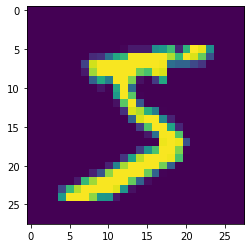

In [3]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(train_dataset[0])
# print(train_label[0])
# print(train_dataset[0])

In [4]:
train_dataset =  train_dataset/255.0
test_dataset =  test_dataset/255.0

In [5]:
def train_epoch():
  model =  tf.keras.Sequential([
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(512,activation=tf.nn.relu),
                              tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

  model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics='accuracy')

  class Callback(tf.keras.callbacks.Callback):
    def on_epoch_stop(self, epoch, logs={}):
      if(logs.get('accuracy')>=0.99):
        print("\n Reached 99 % accuracy so finished training!")
        self.model.stop_training = True
  callbacks = Callback()

  history= model.fit(train_dataset,train_label,epochs=10, callbacks=[callbacks])
  return history.epoch,  history.history['accuracy'][-1]


In [6]:
model = train_epoch()

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2002 - accuracy: 0.9420
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0812 - accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0527 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0364 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0271 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0204 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0177 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0138 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0123 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.009

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 0.9966999888420105)